# Fit of `B0_M` with the MC data
- cut on $\Delta M$ : $143 MeV < \Delta M < 148 MeV$
- Double CB fit on the MC data

## Libraries

In [1]:
import numpy as np
import zfit
import matplotlib.pyplot as plt
import json
#Gives us nice LaTeX fonts in the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)


from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, plot_hist_fit, save_params, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


In [2]:
name_data = 'data_KPiPi'

## Explore the data

In [3]:
df = fct.load_data(years,magnets,type_data = 'data_KPiPi')

/afs/cern.ch/user/d/dhill/public/forAnthony/Bd2DstKPiPi.root


In [ ]:
df["Delta_M"] = df["Dst_M"] - df["D0_M"]

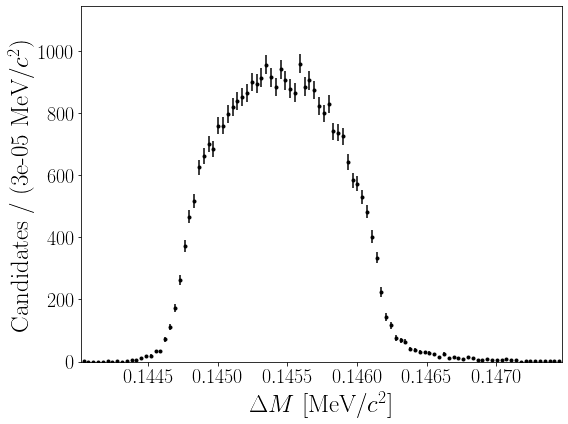

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi/Delta_M_data_KPiPi.pdf


In [7]:
fct.plot_hist({name_data: df},'Delta_M', '$\Delta M$', 'MeV/$c^2$', n_bins = 100, name_folder = name_data, colors='black')

Haha, no need to cut on $\Delta M$ 

## Retrieve data

In [4]:
df = fct.load_data(years,magnets,type_data = 'data_KPiPi',vars = ['B0_M_Tau_Pi12pip'])

/afs/cern.ch/user/d/dhill/public/forAnthony/Bd2DstKPiPi.root


In [5]:
name_data = 'data_KPiPi'
var = 'B0_M_Tau_Pi12pip'
low = 4.3
high = 5.35

## Plot 1D histograms

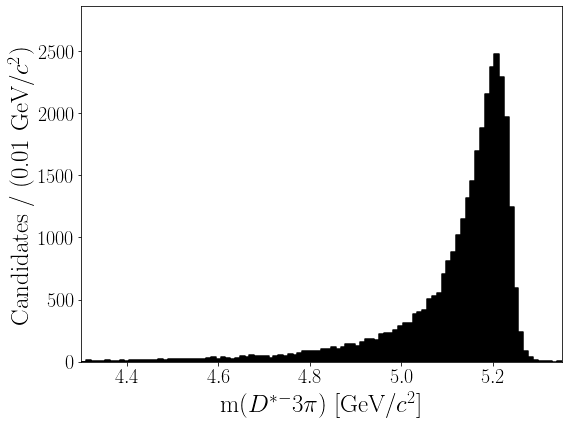

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi/B0_M_Tau_Pi12pip_data_KPiPi.pdf


In [6]:
fct.plot_hist_particle({name_data:df}, var, n_bins = 100, name_folder = name_data, colors='black', mode_hist=True,
                      low=low, high=high)

## Two Crystall ball Fit

In [7]:
obs = zfit.Space("x", limits=(low, high))

In [9]:
muL = zfit.Parameter("muL", 5.2, 5.15, 5.23)
muR = zfit.Parameter("muR", 5.2, 5.15, 5.23)

sigmaL = zfit.Parameter("sigmaL", 0.05, 0.01, 0.1)
sigmaR = zfit.Parameter("sigmaR", 0.05, 0.01, 0.1)

alphaL = zfit.Parameter("alphaL", 0.02, 0.001, 5.)
alphaR = zfit.Parameter("alphaR", 0.02, 0.001, 5.)

nL = zfit.Parameter("nL", 1., 0.1, 4.)
nR = zfit.Parameter("nR", 2., 0.1, 15.)

frac = zfit.Parameter("fraction", 0.3, 0, 3.) # fraction between L and R

In [10]:
name_params = {
    'muL':'$\\mu_L$',
    'sigmaL':'$\\sigma_L$',
    'muR':'$\\mu_R$',
    'sigmaR':'$\\sigma_R$',
    'alphaL':'$\\alpha_L$',
    'alphaR':'$\\alpha_R$',
    'nL':'$n_L$',
    'nR':'$n_R$',
}

In [11]:
# doubleCB = zfit.pdf.DoubleCB(mu, sigma, alphaL, alphaR, nL, nR, obs=obs)

crystalBallL = zfit.pdf.CrystalBall(muL, sigmaL, alphaL, nL, obs=obs)
crystalBallR = zfit.pdf.CrystalBall(muR, sigmaR, alphaR, nR, obs=obs)

model = zfit.pdf.SumPDF([crystalBallL, crystalBallR], fracs=frac) # crystalBallR is multiplied by fracs

data = zfit.Data.from_pandas(df[var],obs=obs)

In [13]:
result, params = launch_fit(model, data)

------------------------------------------------------------------
| FCN = -3.32e+04               |     Ncalls=796 (796 total)     |
| EDM = 0.00165 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name        value    minuit_hesse         minuit_minos    at limit
--------  -------  --------------  -------------------  ----------
fraction    0.895     +/-   0.014  -  0.014   +  0.014       F

Info in negative or zero diagonal element in covariance matrix : i = 7
Info in added to diagonal of Error matrix a value : dg = 0.539118
Info: VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
Info in Edm is smaller than machine accuracy : machineLimit = 0.0019786
Info in Current  Edm is : edm = 0.00165267
Info in Required Edm is : edmval = 0.001


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:392: UserWarning: The function <function Space.limits at 0x7f4c0cc553b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4.3]]), array([[5.35]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7f4c0cc5b7a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4.3]]), array([[5.35]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


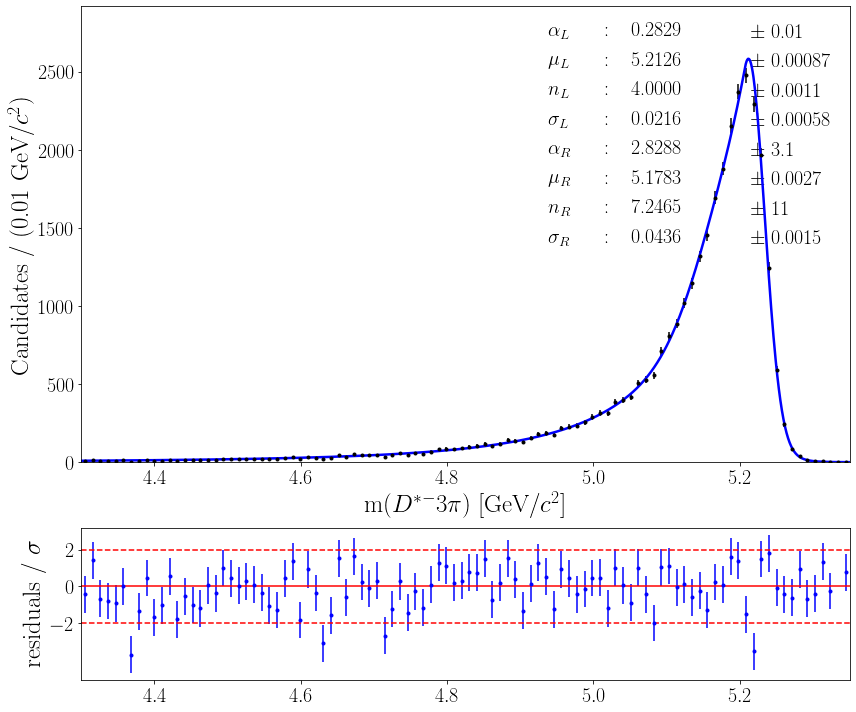

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi/B0_M_Tau_Pi12pip_data_KPiPi_fit.pdf


In [14]:
plot_hist_fit_particle(df, var, models = model, obs=obs, n_bins = 100,mode_hist = False,
              name_folder = name_data,name_data = name_data,params=params,name_params=name_params)   

In [ ]:
#save_params(params, name_data, True)